# Sampling Overview

Get the Detailed Overview: <a href="https://github.com/AnjulaMehto/Sampling_Assignment">Here</a>

### Import Libraries

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Getting the overview of the dataset

In [2]:
df = pd.read_csv('creditcard_data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check if the dataset is balanced or not.

0    763
1      9
Name: count, dtype: int64


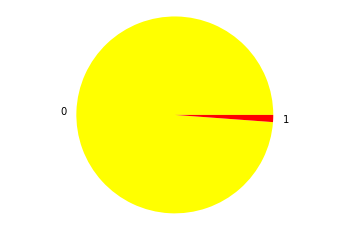

In [4]:
def plot_data_composition(df):
    grouped_data = df.groupby(df['Class']).size().reset_index(name='count')
    labels = grouped_data['Class'].astype(str)
    sizes = grouped_data['count']
    print(sizes)
    colors = ['yellow', 'red']

    plt.pie(sizes, labels=labels, colors=colors)
    plt.axis('equal')
    plt.show()
plot_data_composition(df)


### As we can see, our dataset is not at all balanced, so we will use resampling technique to balance the dataset.

## Sampling Techniques:

<ul>
    <li>
        <b>Random sampling:</b> Systematic sampling involves selecting every kth item from a population, where k is a constant interval.
    </li>
    </br>
    <li>
        <b>Systematic sampling:</b> Systematic sampling involves selecting every kth item from a population, where k is a constant interval.
    </li>
    </br>
    <li>
        <b>Stratified sampling:</b> Duplicate instances from the minority class or generate synthetic samples to match the number of instances in the majority class.
    </li>
</ul>

In [11]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

In [13]:
# Define parameters for sample size calculation
z_value = 2.576  # 99% confidence interval
margin_error = 0.05

In [14]:
# Calculate the sample size for all sampling techniques using the formula
sample_size = int(np.ceil((z_value**2 * 0.05 * (1-0.05)) / (margin_error**2)))

In [29]:
# Define the sampling techniques and models
samplers = {
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy='majority', random_state=40),
    'RandomOverSampler': RandomOverSampler(sampling_strategy='minority', random_state=40),
    'SMOTE': SMOTE(sampling_strategy='minority', random_state=40),
    'NearMiss' : NearMiss(version=3, n_neighbors=4),
    'SystematicSampling': 'systematic',  
}


In [18]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=500),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
}

In [19]:
# Define a systematic sampling function
def systematic_sampling(X, y, sample_size):
    indexes = np.arange(0, len(X), len(X)//sample_size)
    return X.iloc[indexes], y.iloc[indexes]

In [30]:
# Evaluate each model on each sampling technique
results = {}
for sampler_name, sampler in samplers.items():
    if sampler_name == 'SystematicSampling':
        X_resampled, y_resampled = systematic_sampling(X_train, y_train, sample_size)
    else:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    for model_name, model in models.items():
        # Train the model on the resampled data
        model.fit(X_resampled, y_resampled)

        # Ensure X_test is a NumPy array and C-contiguous
        X_test_array = np.ascontiguousarray(np.array(X_test))

        # Make predictions on the test data
        y_pred = model.predict(X_test_array)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Add the accuracy score to the results dictionary
        results.setdefault(model_name, {}).setdefault(sampler_name, accuracy)


/home/sanyamgoyal401/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sanyamgoyal401/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sanyamgoyal401/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/sanyamgoyal401/.local/lib/python3.10/site-packages/sklearn/base.py

In [53]:
# Print the results
print('Results:')
print(' ' * 20, end='')  # Padding
for sampler_name in samplers.keys():
    print(f'{sampler_name:<20}', end='')
print()

for model_name, model_results in results.items():
    print(f'{model_name:<20}', end='')
    for sampler_name in samplers.keys():
        print(f'{results[model_name].get(sampler_name, 0.0):<17.5f}   ', end='')
    print()

Results:
                    RandomUnderSampler  RandomOverSampler   SMOTE               NearMiss            SystematicSampling  
LogisticRegression  0.91885             0.92670             0.92147             0.71466             0.87435             
DecisionTree        0.99738             0.99738             0.99738             0.89791             0.95288             
RandomForest        1.00000             1.00000             1.00000             0.92147             0.99215             
SVM                 0.69895             0.70157             0.69895             0.51571             0.70942             
KNeighbors          0.98168             0.98429             0.98429             0.74869             0.87435             
